In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading data

In [2]:
houses_df = pd.read_csv( "./data/home_data.csv" )

In [3]:
houses_df.shape

(21613, 21)

In [4]:
houses_df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring data

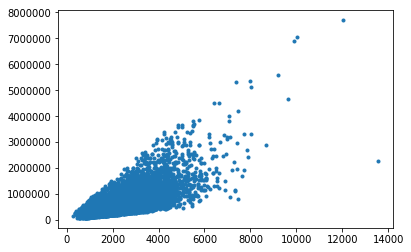

In [6]:
plt.plot( houses_df[ "sqft_living" ], houses_df[ "price" ], "." )

## Q1: What is the neighborhood with the highest average house sale price?

In [7]:
houses_df.groupby( [ "zipcode" ] ).agg( { "price" : "mean" } ).reset_index().sort_values( by = "price", ascending = False ).head( 1 )

,zipcode,price
24,98039,2160606.6


## Q2: What fraction of houses have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft?

In [8]:
houses_df.loc[ ( houses_df[ "sqft_living" ] > 2000 ) & ( houses_df[ "sqft_living" ] <= 4000 ) ].shape[ 0 ] / houses_df.shape[ 0 ]

0.42187572294452413

# Splitting data

In [9]:
houses_train_df, houses_test_df = train_test_split( houses_df, test_size = .2, random_state = 0 )

In [10]:
houses_train_df.shape

(17290, 21)

In [11]:
houses_test_df.shape

(4323, 21)

# Training a simple model

In [12]:
simple_features = [ "sqft_living" ]

In [13]:
simple_model = LinearRegression( normalize = True, n_jobs = -1 )

In [14]:
simple_model.fit( houses_train_df[ simple_features ], houses_train_df[ "price" ] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [15]:
simple_model.coef_

array([283.96855737])

### Evaluating the model

In [16]:
print( houses_test_df[ "price" ].mean() )

529242.6106870229


In [17]:
np.sqrt( mean_squared_error( houses_test_df[ "price" ], simple_model.predict( houses_test_df[ simple_features ] ) ) )

248879.06143647005

### Visualizing predictions

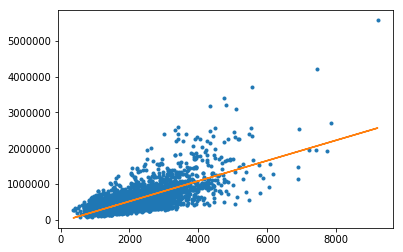

In [18]:
plt.plot( houses_test_df[ "sqft_living" ], houses_test_df[ "price" ], ".", 
         houses_test_df[ "sqft_living" ], simple_model.predict( houses_test_df[ simple_features ] ), "-" )

# Training a more complex model

In [19]:
complex_features = [ "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "zipcode" ]

In [20]:
complex_model = LinearRegression( normalize = True, n_jobs = -1 )

In [21]:
complex_model.fit( houses_train_df[ complex_features ], houses_train_df[ "price" ] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [22]:
complex_model.coef_

array([-5.66006330e+04,  1.10870936e+04,  3.20408369e+02, -2.89499140e-01,
       -2.41800491e+03,  6.17971071e+02])

### Evaluating the model

In [23]:
print( houses_test_df[ "price" ].mean() )

529242.6106870229


In [24]:
np.sqrt( mean_squared_error( houses_test_df[ "price" ], complex_model.predict( houses_test_df[ complex_features ] ) ) )

244004.7744310427

# Comparing both models

In [25]:
print( np.sqrt( mean_squared_error( houses_test_df[ "price" ], simple_model.predict( houses_test_df[ simple_features ] ) ) ) )
print( np.sqrt( mean_squared_error( houses_test_df[ "price" ], complex_model.predict( houses_test_df[ complex_features ] ) ) ) )

248879.06143647005
244004.7744310427


# Training an advanced model

In [26]:
advanced_features = [ "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "zipcode", "condition", "grade", "waterfront", "view", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15" ]

In [27]:
advanced_model = LinearRegression( normalize = True, n_jobs = -1 )

In [28]:
advanced_model.fit( houses_train_df[ advanced_features ], houses_train_df[ "price" ] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [29]:
advanced_model.coef_

array([-3.46742831e+04,  3.94310007e+04,  9.09144653e+01,  1.75888737e-01,
        7.42456845e+03, -5.67468805e+02,  2.61695183e+04,  9.35901502e+04,
        6.05600529e+05,  5.27368893e+04,  9.44834653e+01,  6.15186252e+01,
       -2.60713698e+03,  2.01053038e+01,  6.04865961e+05, -2.22392029e+05,
        2.42333853e+01, -4.67450072e-01])

### Evaluating the model

In [30]:
print( houses_test_df[ "price" ].mean() )

529242.6106870229


In [31]:
np.sqrt( mean_squared_error( houses_test_df[ "price" ], advanced_model.predict( houses_test_df[ advanced_features ] ) ) )

190473.3757096756

# Comparing both models

In [32]:
print( np.sqrt( mean_squared_error( houses_test_df[ "price" ], simple_model.predict( houses_test_df[ simple_features ] ) ) ) )
print( np.sqrt( mean_squared_error( houses_test_df[ "price" ], complex_model.predict( houses_test_df[ complex_features ] ) ) ) )
print( np.sqrt( mean_squared_error( houses_test_df[ "price" ], advanced_model.predict( houses_test_df[ advanced_features ] ) ) ) )

248879.06143647005
244004.7744310427
190473.3757096756


## Q3: What is the difference in RMSE between the model trained with complex_features and the one trained with advanced_features?

In [33]:
np.sqrt( mean_squared_error( houses_test_df[ "price" ], complex_model.predict( houses_test_df[ complex_features ] ) ) ) - np.sqrt( mean_squared_error( houses_test_df[ "price" ], advanced_model.predict( houses_test_df[ advanced_features ] ) ) )

53531.39872136709